In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.s import simulate_s

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
n_rows = 10
n_columns = 100

In [3]:
target = simulate_s(n_columns, index_prefix='Sample ')

In [4]:
features_continuous = simulate_df(
    n_rows, n_columns, index_prefix='Feature ', column_prefix='Sample ')

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


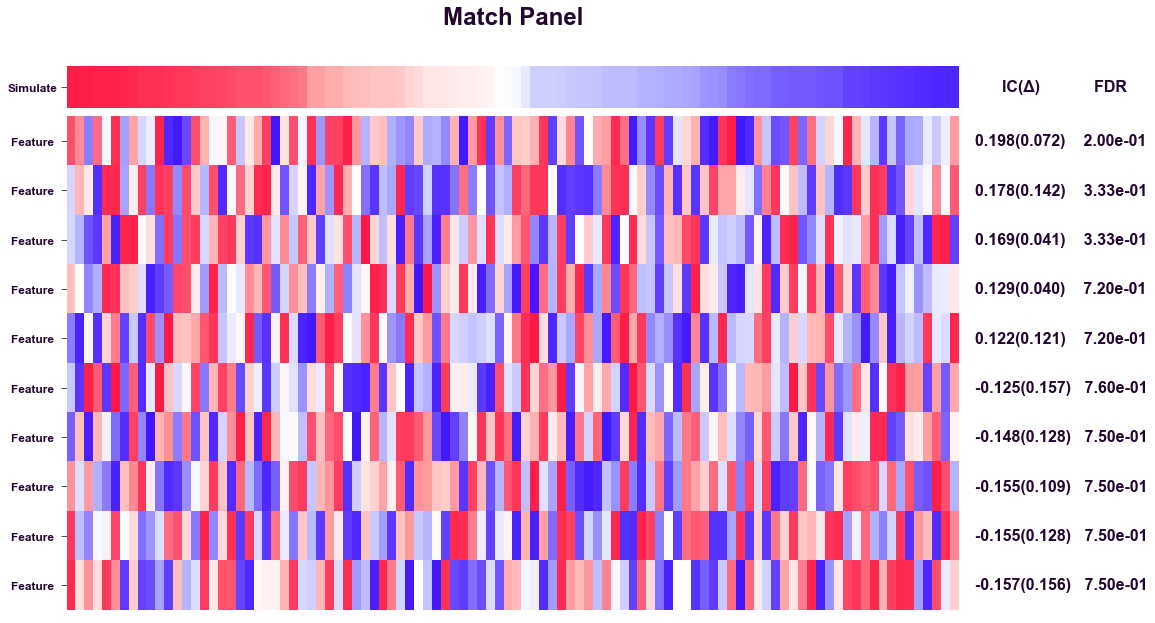

In [27]:
match_scores_for_continuous = make_match_panel(
    target,
    features_continuous,
    n_features=5,
    n_samplings=5,
    n_permutations=5,
    plot_sample_names=True)

In [6]:
target_str = pd.Series(
    ['T0'] * (n_columns // 2) + ['T1'] * (n_columns // 2), index=target.index)

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


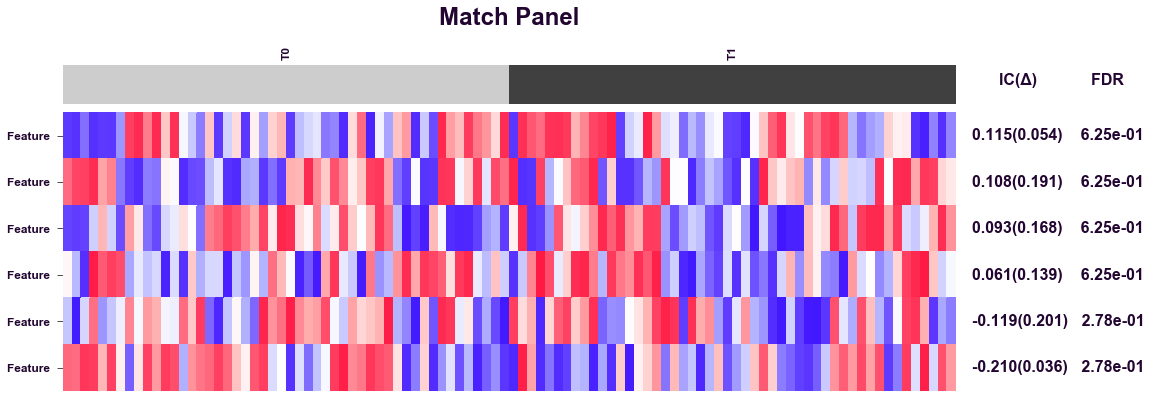

In [7]:
match_scores_for_continuous = make_match_panel(
    target_str,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    target_type='binary',
    plot_sample_names=True)

In [8]:
features_categorical = simulate_df(
    n_rows, n_columns, 8, index_prefix='Feature ', column_prefix='Sample ')

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


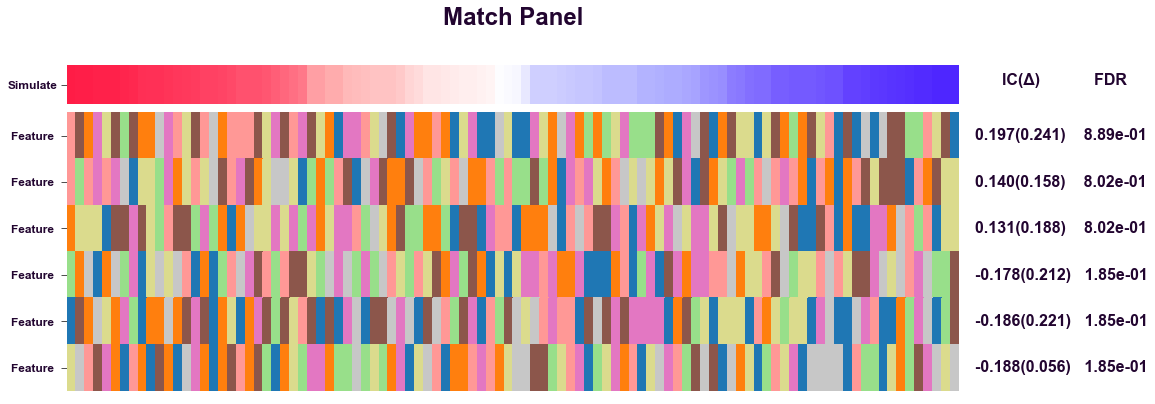

In [9]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='categorical',
    plot_sample_names=True)

In [10]:
features_binary = simulate_df(
    n_rows, n_columns, 2, index_prefix='Feature ', column_prefix='Sample ')

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


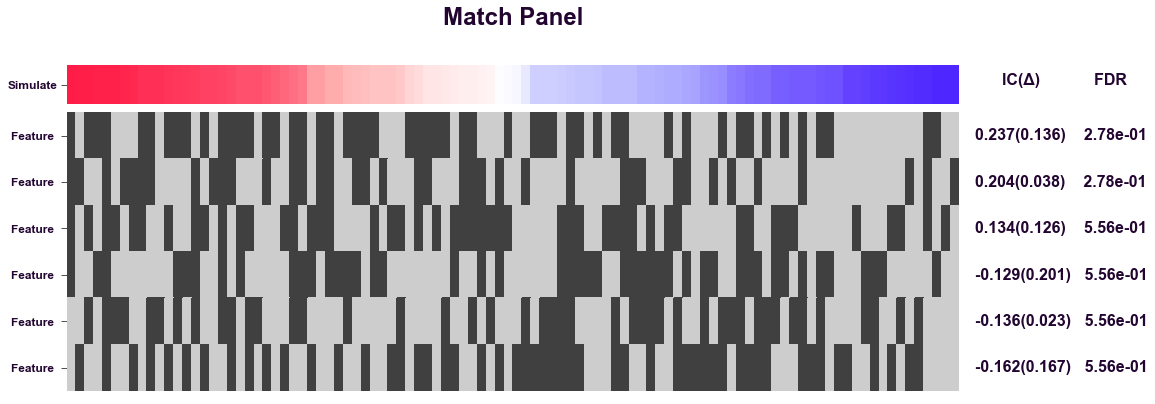

In [11]:
match_scores_for_binary = make_match_panel(
    target,
    features_binary,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [12]:
features_with_missing = simulate_df(
    n_rows, n_columns, index_prefix='Feature ', column_prefix='Sample ')

features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_columns // 3),
    np.random.choice(features_with_missing.columns, size=n_columns //
                     3)] = None

/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


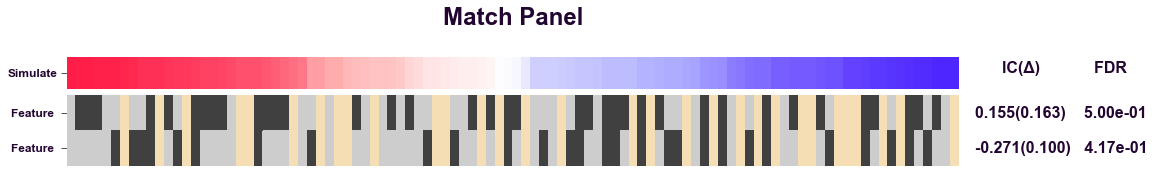

In [13]:
match_scores_for_binary = make_match_panel(
    target,
    features_with_missing,
    n_features=0.95,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [14]:
features = [
    [
        'Continuous features',
        features_continuous,
        ['Feature {}'.format(i) for i in range(n_rows)],
        ['Alias {}'.format(i) for i in range(n_rows)],
        None,  #match_scores_for_continuous,
        False,
        'continuous',
    ],
    [
        'Categorical features',
        features_categorical,
        ['Feature {}'.format(i) for i in range(n_rows)],
        ['Alias {}'.format(i) for i in range(n_rows)],
        None,  #match_scores_for_categorical,
        False,
        'categorical',
    ],
    [
        'Binary features',
        features_binary,
        ['Feature {}'.format(i) for i in range(n_rows)],
        ['Alias {}'.format(i) for i in range(n_rows)],
        None,  #match_scores_for_binary,
        False,
        'binary',
    ],
    [
        'Cntinuous features (scores ascending)',
        features_continuous.iloc[:, :-1],
        ['Feature {}'.format(i) for i in range(n_rows)],
        ['Alias {}'.format(i) for i in range(n_rows)],
        None,  #match_scores_for_continuous,
        True,
        'continuous',
    ],
]

Making match panel for Continuous features ...
Making match panel for Categorical features ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making match panel for Binary features ...
Making match panel for Cntinuous features (scores ascending) ...


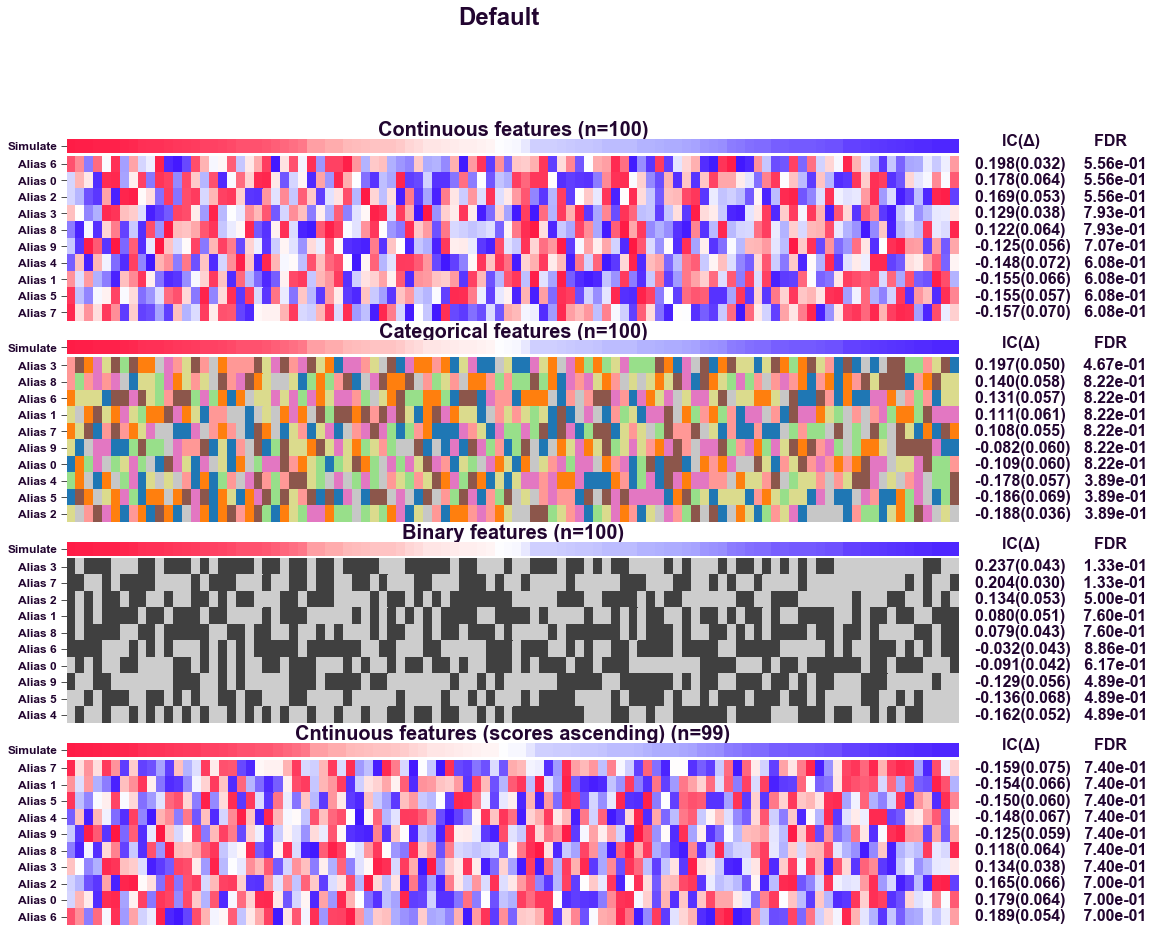

In [15]:
make_summary_match_panel(
    target, features, title='Default', plot_sample_names=True)

Making match panel for Continuous features ...
Making match panel for Categorical features ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making match panel for Binary features ...
Making match panel for Cntinuous features (scores ascending) ...


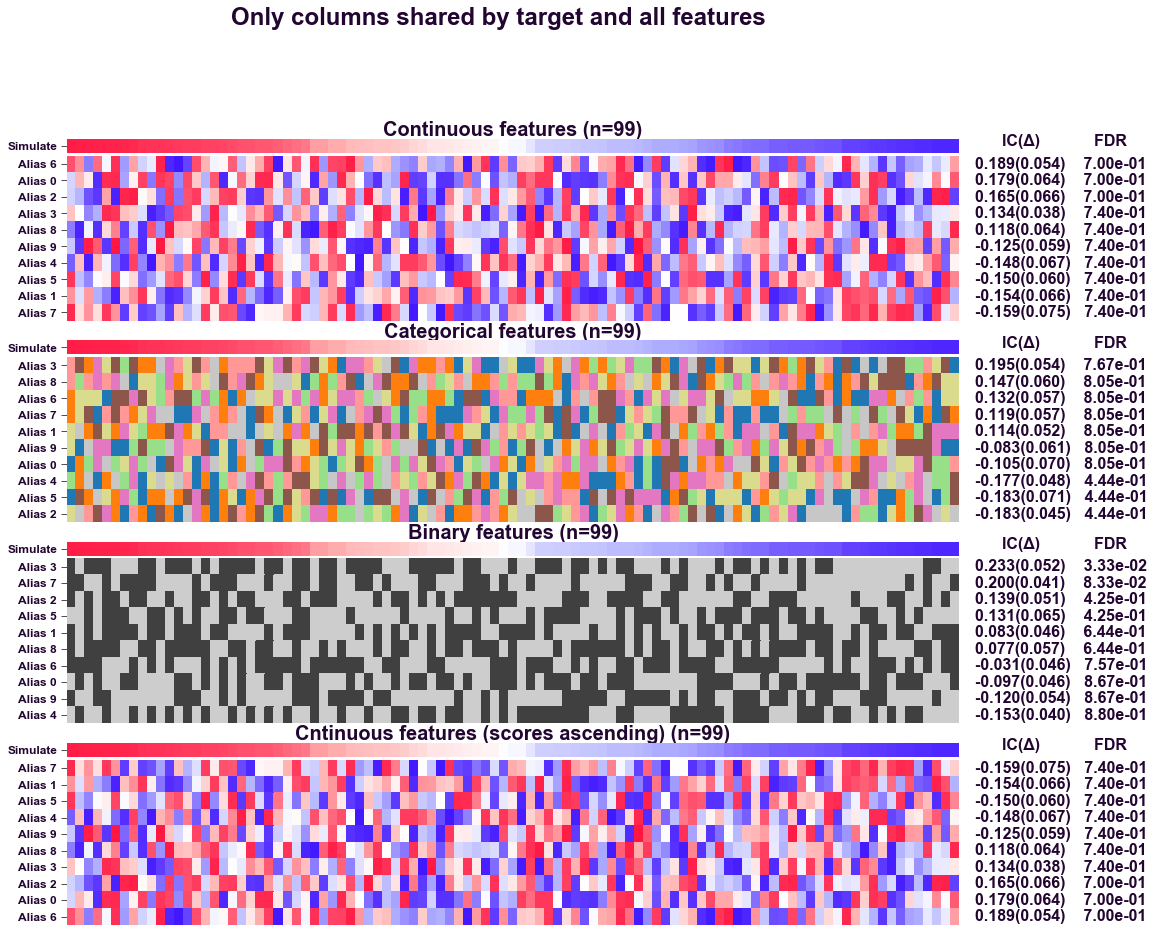

In [16]:
make_summary_match_panel(
    target,
    features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only columns shared by target and all features',
    plot_sample_names=True)